# Heart Disease Prediction Assignment

**Name:** [SPARSH GUPTA]
**Date:** [15-09-2025]
**Estimated Time:** 2 hours

This notebook demonstrates building and evaluating a supervised machine learning model for heart disease prediction using the Heart Disease UCI dataset.

## Import Libraries

Import all necessary libraries for the assignment.

In [2]:
# TODO: Import the required libraries
# Required imports: pandas, numpy, sklearn modules (RandomForestClassifier, train_test_split,
#                  accuracy_score, confusion_matrix, classification_report, StandardScaler, etc.)
# Optional: matplotlib, seaborn for visualization, GridSearchCV for hyperparameter tuning
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.models import RandomForestClassifier()
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt



---
## Task 1: Load & Understand the Data

Load the Heart Disease UCI dataset and explore its basic characteristics.

In [3]:
# TODO: Load the dataset
# Use pd.read_csv() to load 'heart.csv'
# Display the first few rows to understand the structure
data = pd.read_csv("heart.csv")
data.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# TODO: Print dataset information
# Display:
# - Shape (rows/columns)
# - Feature names & data types
# - Target variable distribution
# - Basic statistics using .describe()

print(data.shape)
print("feature names", data.columns.tolist(), data.dtypes)
print("target distribution", data["target"].value_counts())
print("data description" ,data.describe(include = 'all'))



(303, 14)
feature names ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'] age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
target distribution target
1    165
0    138
Name: count, dtype: int64
data description               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000 

In [5]:
# TODO: Check for missing values and data quality
# Use .isnull().sum() to check for missing values
# Examine unique values in categorical columns (cp, thal, slope, etc.)

print(data.isnull().sum())
for c in data.select_dtypes(include = "object").columns:
    print(f"{c}: {df[c].unique()}")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Dataset Description (Max 75 words)

**Instructions:** Describe the dataset, mention the target variable, key features, and any notable observations about the data structure or quality.

**Your description:**
I uploaded heart.csv dataset from Kaggle. Which contains 303 patient records with 14 key features and a target value indicating heart disease presence
Dataset Features : age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
Dataset details: Classification of heart disease based on key features
Quality of the data structure is great with no missing values and outliers
Structure is also goodwith balance in no. of categorical and numerical data

---
## Task 2: Preprocessing

Clean and prepare the data for machine learning model training.

In [6]:
# TODO: Handle missing values (if any)
# Check if there are missing values and decide whether to drop or impute
# Most heart disease datasets are clean, but verify this

#NO MISSSING VALUES

In [7]:
# TODO: Encode categorical features
# Identify categorical columns (cp, thal, slope, etc.)
# Use appropriate encoding method (get_dummies, LabelEncoder, or leave as-is if already numeric)
# Consider which columns need encoding vs which are already properly formatted

# data = pd.get_dummies(data, columns = ['cp', 'slope', 'thal', 'restecg'], drop_first = True)
data
#but already numeric so leave

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# TODO: Normalize or standardize numerical features
# Identify numerical columns that might benefit from scaling (age, trestbps, chol, etc.)
# Use StandardScaler or MinMaxScaler from sklearn.preprocessing
# Remember to fit on training data and transform both train and test

num_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
stscaler = StandardScaler()
data_ss = data.copy()
data[num_cols] = stscaler.fit_transform(data_ss[num_cols])
# data_ss
# minmaxsc = MinMaxScaler()
# datammscaler = data.copy()
# datammscaler[num_cols] = minmaxsc.fit_transform(data[num_cols])
# datammscaler
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,37,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,41,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,56,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,57,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
299,45,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
300,68,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
301,57,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0


In [9]:
# TODO: Split into features (X) and target (y), then train/test sets
# Separate the target variable (typically 'target' or 'num') from features
# Use train_test_split with test_size=0.2 and random_state for reproducibility
# Consider using stratify parameter to maintain class balance

from sklearn.model_selection import train_test_split, cross_val_score
X = data.drop(columns = ['target'])
Y = data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = Y)
print("TRAIN SHAPE:", X_train.shape, "TEST SHAPE:", X_test.shape)

TRAIN SHAPE: (242, 13) TEST SHAPE: (61, 13)


### Preprocessing Steps Explanation (Max 75 words)

**Instructions:** Briefly explain your preprocessing choices - how you handled missing values, categorical encoding, and feature scaling decisions.

**Your explanation:**
1. checked for missing values
2. no missing values found so no requirement of handling them
3. identified the categorical data
4. no need of one hot encoding bacause the data is already in the numerical form
5. then used standard scaler on the numerical columns except age
6. used standard scaler because of better clarity

---
## Task 3: Model Training & Evaluation

Train a Random Forest Classifier and evaluate its performance using multiple metrics.

In [10]:
# TODO: Train a Random Forest Classifier
# Create a RandomForestClassifier instance with random_state for reproducibility
# You can use default parameters or set n_estimators, max_depth, etc.
# Fit the model on training data
# Make predictions on test data

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)



In [11]:
# TODO: Evaluate using Accuracy
# Calculate accuracy score for both training and test sets
# Display the results in a clear format
# Check for potential overfitting by comparing train vs test accuracy
test_accuracy = accuracy_score(Y_test, y_pred)
y_tpred = rf.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_tpred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
if train_accuracy > test_accuracy + 0.05:
    print("Potential Overfit")
else:
    print("no overfit")



Train Accuracy: 1.0000
Test Accuracy: 0.8361
Potential Overfit


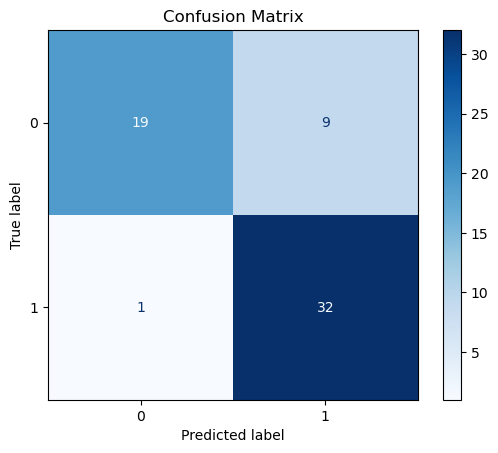

In [12]:
# TODO: Create and display Confusion Matrix
# Use confusion_matrix from sklearn.metrics
# Display the matrix in a readable format
# Optional: Use seaborn heatmap for better visualization
# Extract TP, TN, FP, FN for interpretation
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot(cmap = 'Blues')
plt.title("Confusion Matrix")
plt.show()


In [13]:
# TODO: Optional - Generate Classification Report
# Use classification_report to get precision, recall, and F1-score
# This provides detailed per-class performance metrics



In [14]:
# TODO: Optional - Plot ROC Curve (if time allows)
# Import roc_curve and auc from sklearn.metrics
# Plot ROC curve using matplotlib
# Calculate and display AUC score



### Performance Summary (Max 100 words)

**Instructions:** Summarize the model's performance using accuracy, confusion matrix results, and any additional metrics you calculated. Comment on the model's effectiveness for heart disease prediction.

**Your summary:**
The model performs very well on training and test data but can have potential overfitting
83.61% accuracy score is very good
Confusion matrix also proves that there are very fer anomalies or false predictions in total 10 


---
## Bonus Task (Optional)

Choose one of the following improvement approaches to enhance your model.

### Option 1: Hyperparameter Tuning

In [15]:
# TODO: Optional - Hyperparameter Tuning using GridSearchCV
# Define parameter grid for Random Forest (n_estimators, max_depth, min_samples_split, etc.)
# Use GridSearchCV with cross-validation
# Compare best model performance with original model
# Note: This may take some time to run



### Option 2: Feature Engineering

In [16]:
# TODO: Optional - Create engineered features
# Ideas: BMI-like ratios, age groups, risk categories, interaction terms
# Example: Cholesterol-to-age ratio, blood pressure categories, etc.
# Test if the new feature improves model performance



### Bonus Task Summary

**Instructions:** If you completed a bonus task, provide 1-2 sentences summarizing what you tried and whether it improved the model performance.

**Your bonus summary:**
[Write your bonus summary here if completed]

---
## Feature Importance Analysis (Optional)

In [17]:
# TODO: Optional - Analyze feature importance
# Random Forest provides feature_importances_ attribute
# Create a visualization showing which features are most important for prediction
# This can provide medical insights into heart disease risk factors



---
## Conclusion

**Instructions:** Write a brief overall conclusion about your analysis. Discuss the model's performance, key findings about heart disease prediction factors, and potential real-world applications or limitations.

**Your conclusion:**
I think model is very good for the given parameters and features but new features like history, tests, reports should be added

---
## Assignment Checklist

**Before submitting, ensure you have completed:**

### Task 1: Load & Understand Data ✓
- [✓] Loaded the heart.csv dataset
- [✓] Displayed dataset shape (rows/columns)
- [✓] Identified feature names & types
- [✓] Analyzed target variable distribution
- [✓] Written dataset description (max 75 words)

### Task 2: Preprocessing ✓
- [v] Handled missing values (if any)
- [✓] Encoded categorical features appropriately
- [✓] Normalized/standardized numerical features
- [✓] Split data into train/test (80/20)
- [✓] Written preprocessing explanation (max 75 words)

### Task 3: Model Training & Evaluation ✓
- [✓] Trained Random Forest Classifier
- [✓] Calculated accuracy score
- [✓] Created confusion matrix
- [ ] Optional: Generated classification report
- [ ] Optional: Plotted ROC curve
- [✓] Written performance summary (max 100 words)

### Bonus Task (Optional) ✓
- [ ] Attempted hyperparameter tuning OR feature engineering
- [ ] Compared results with base model
- [ ] Written 1-2 sentence impact summary

### General Requirements ✓
- [✓] Code is clean, readable, and well-commented
- [✓] All markdown explanations are completed
- [✓] Notebook runs from top to bottom without errors
- [✓] All outputs are visible and properly formatted
- [✓] Word limits respected for all written sections
- [✓] Single .ipynb file ready for submission

---
## Additional Notes

**Dataset Information:**
- The Heart Disease UCI dataset typically contains 13-14 features
- Common features include: age, sex, cp (chest pain type), trestbps (resting blood pressure), chol (cholesterol), etc.
- Target variable usually indicates presence (1) or absence (0) of heart disease
- Dataset is generally clean with minimal missing values

**Evaluation Focus:**
- Code correctness & clarity (40%)
- Preprocessing & feature handling (25%)
- Model evaluation & metrics (25%)
- Bonus attempt (10%)

**Tips for Success:**
- Keep code clean and well-commented
- Test your notebook from top to bottom before submission
- Focus on clear explanations in markdown cells
- Consider the medical context when interpreting results